In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df=pd.read_csv('wineQualityReds.csv')


In [3]:
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
Unnamed: 0              1599 non-null int64
fixed.acidity           1599 non-null float64
volatile.acidity        1599 non-null float64
citric.acid             1599 non-null float64
residual.sugar          1599 non-null float64
chlorides               1599 non-null float64
free.sulfur.dioxide     1599 non-null float64
total.sulfur.dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
fixed.acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile.acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric.acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual.sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free.sulfur.dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total.sulfur.dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


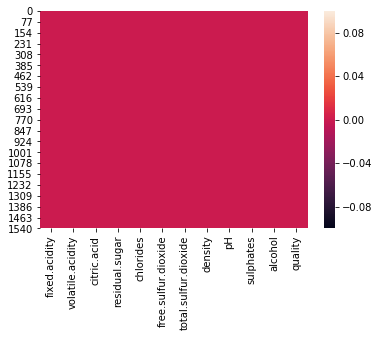

In [7]:
sns.heatmap(df.isnull())

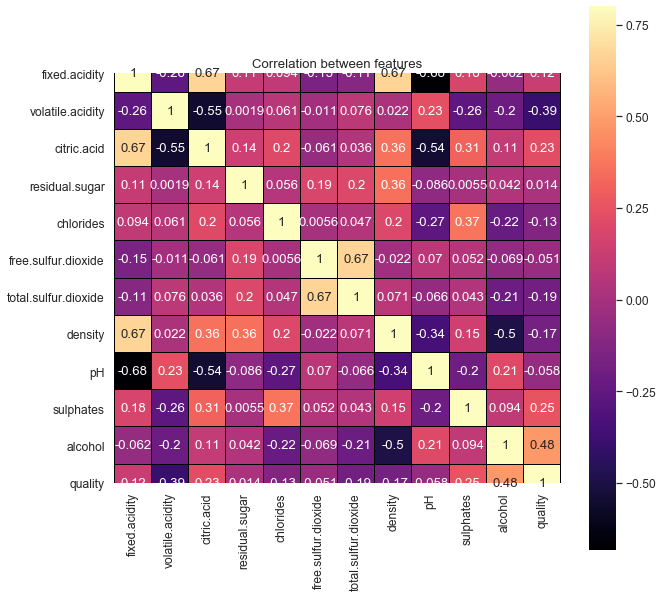

In [8]:

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(df.corr(), vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='magma',linecolor="black")
plt.title('Correlation between features');


In [9]:
df['quality'].value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

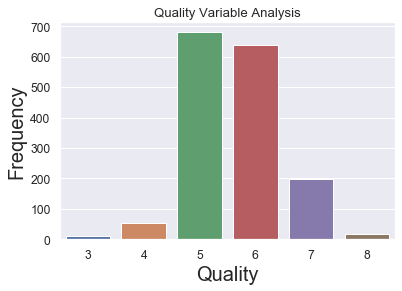

In [10]:

sns.countplot(x='quality',data=df)
plt.title('Quality Variable Analysis')
plt.xlabel('Quality').set_size(20)
plt.ylabel('Frequency').set_size(20)
plt.show()

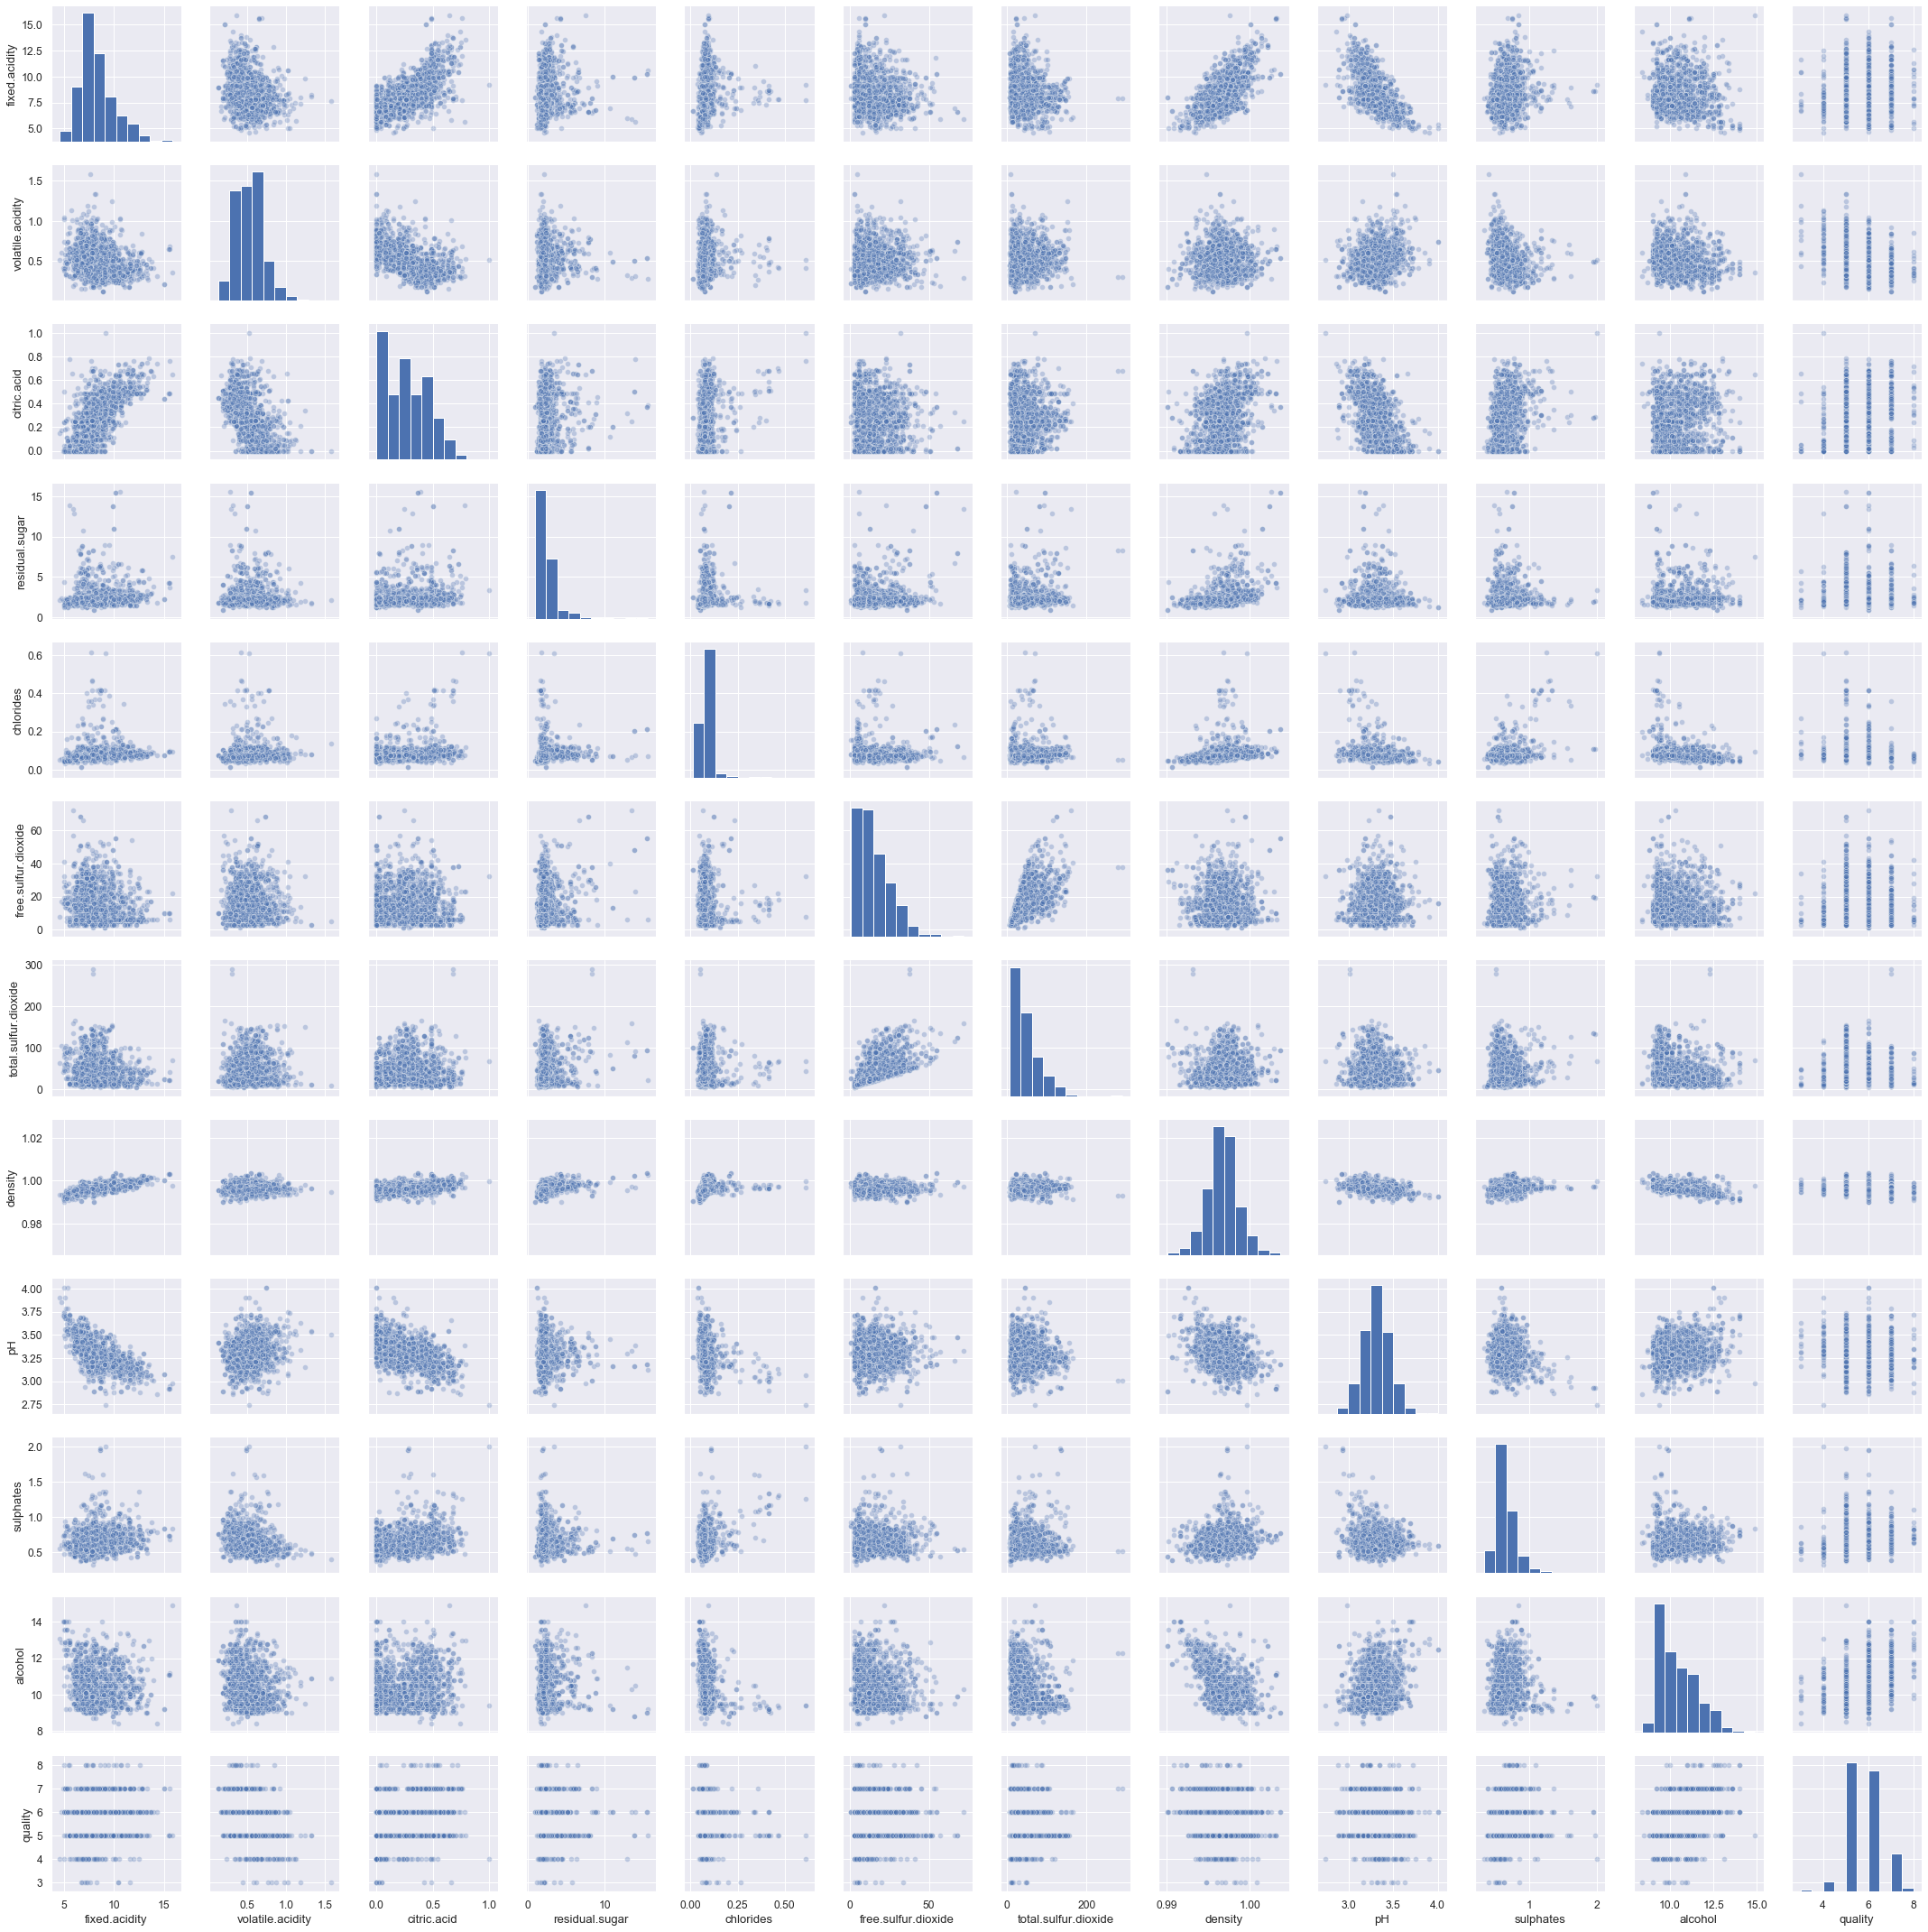

In [11]:
sns.pairplot(df,plot_kws={'alpha':0.3})


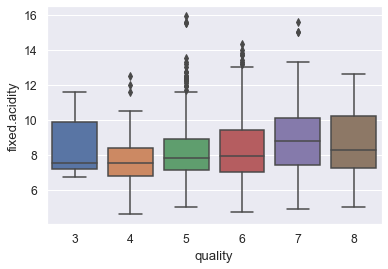

In [12]:
sns.boxplot(df['quality'],df['fixed.acidity'])


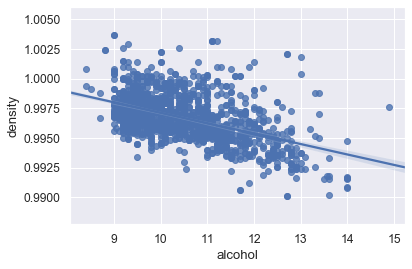

In [13]:
sns.regplot('alcohol','density',data=df)


In [14]:
conditions = [
    (df['quality'] >= 7),
    (df['quality'] <= 4)
]
rating = ['good', 'bad']
df['rating'] = np.select(conditions, rating, default='average')
df.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

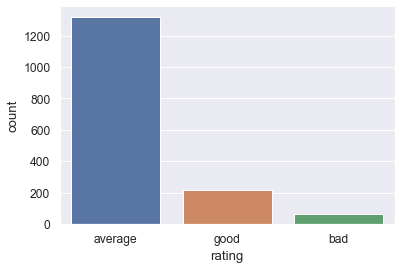

In [15]:
sns.countplot(x='rating',data=df)


In [16]:
df.groupby('rating').mean()


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
bad,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
good,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


In [17]:
X = df.iloc[:,:-2].values
y = df.iloc[:,-1].values

In [18]:
X.shape


(1599, 11)

In [19]:
y.shape

(1599,)

In [20]:
from sklearn.preprocessing import LabelEncoder

y_le = LabelEncoder()

y = y_le.fit_transform(y)

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
x_new = pca.fit_transform(X)

In [29]:
x_new

array([[-1.32249050e+01, -2.02389981e+00, -1.12682053e+00, ...,
        -1.98017553e-01,  3.15474845e-02, -1.47050612e-01],
       [ 2.20377236e+01,  4.40832155e+00, -3.10377987e-01, ...,
        -3.01324964e-01,  2.23873766e-01,  1.43165060e-01],
       [ 7.16267333e+00, -2.50146086e+00, -5.81868296e-01, ...,
        -2.05113668e-01,  1.36190007e-01,  5.84800924e-02],
       ...,
       [-3.43135351e+00,  1.42712435e+01, -1.75071927e+00, ...,
         8.95128040e-02,  7.86224772e-02,  2.68348154e-02],
       [ 1.13287834e+00,  1.63161673e+01, -2.13441396e+00, ...,
         1.55484011e-02,  9.45607475e-02, -4.17320808e-02],
       [-3.87437660e+00,  3.12634754e+00, -1.87414925e+00, ...,
         4.00244077e-01, -1.61217682e-01,  9.01912976e-02]])

In [30]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(x_new,y,test_size=0.2,random_state=0)


In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score

from sklearn.svm import SVC

classifier = SVC(kernel='linear')
classifier.fit(X_train,y_train)
knn_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print(accuracy_score(y_test,knn_pred))

[[277   0   0]
 [ 13   0   0]
 [ 30   0   0]]
0.865625


In [33]:
from sklearn.neighbors import KNeighborsClassifier


classifier = KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
knn_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print(accuracy_score(y_test,knn_pred))

[[267   0  10]
 [ 13   0   0]
 [ 18   0  12]]
0.871875


In [34]:
from sklearn.linear_model import LogisticRegression


classifier = LogisticRegression()
classifier.fit(X_train,y_train)
lr_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,lr_pred))
print(accuracy_score(y_test,lr_pred))

[[266   0  11]
 [ 13   0   0]
 [ 19   0  11]]
0.865625


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
